<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Loan_Default_Prediction_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       297
           1       0.33      0.33      0.33         3

    accuracy                           0.99       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix:
[[295   2]
 [  2   1]]
ROC AUC Score: 0.99


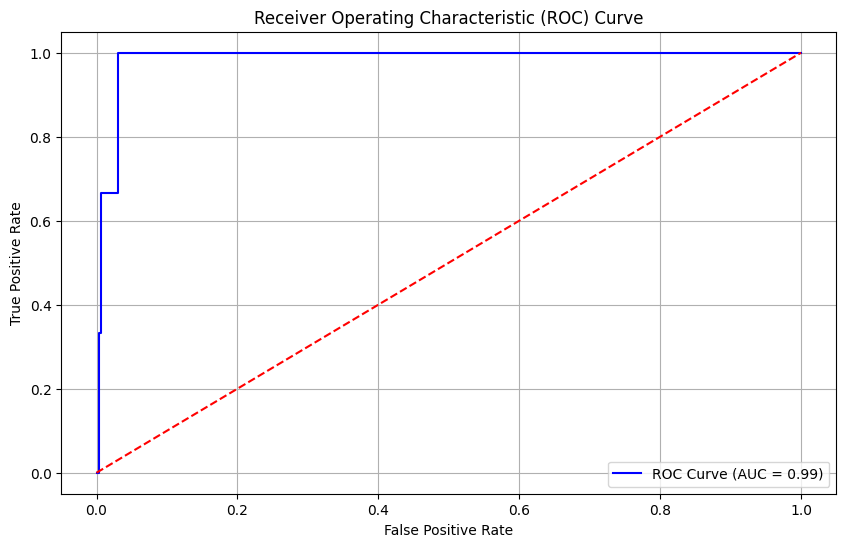

Feature Importance:
        Feature  Coefficient
3        Tenure     1.131345
1   Loan_Amount     0.000366
0        Income    -0.000176
2  Credit_Score    -0.012594


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Simulate Synthetic Data for Loan Applications
np.random.seed(42)  # For reproducibility

num_customers = 1000  # Number of loan applicants

# Generate synthetic features
income = np.random.normal(50000, 15000, num_customers)  # Annual income
loan_amount = np.random.normal(20000, 5000, num_customers)  # Loan amount
credit_score = np.random.randint(300, 850, num_customers)  # Credit score between 300 and 850
tenure = np.random.randint(1, 10, num_customers)  # Loan tenure in years

# Create a DataFrame
data = pd.DataFrame({
    'Income': income,
    'Loan_Amount': loan_amount,
    'Credit_Score': credit_score,
    'Tenure': tenure
})

# Define loan default based on synthetic probabilities
# Assuming lower income, higher loan amount, low credit score, and long tenure increase default probability
data['Default'] = np.where(
    (data['Income'] < 40000) &
    (data['Loan_Amount'] > 25000) &
    (data['Credit_Score'] < 600) &
    (data['Tenure'] > 5),
    1, 0
)

# Step 2: Split Data into Training and Testing Sets
X = data[['Income', 'Loan_Amount', 'Credit_Score', 'Tenure']]
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 5: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 6: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Step 7: Analyze Feature Importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:")
print(feature_importance)
